## File descriptions
- sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
- test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
- sample_submission.csv - a sample submission file in the correct format.
- items.csv - supplemental information about the items/products.
- item_categories.csv  - supplemental information about the items categories.
- shops.csv- supplemental information about the shops.

## Data fields
- ID - an Id that represents a (Shop, Item) tuple within the test set
- shop_id - unique identifier of a shop
- item_id - unique identifier of a product
- item_category_id - unique identifier of item category
- item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
- item_price - current price of an item
- date - date in format dd/mm/yyyy
- date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
- item_name - name of item
- shop_name - name of shop
- item_category_name - name of item category

In [10]:
import numpy as np
import pandas as pd

In [11]:
sales = pd.read_csv('../predict-future-sales/data/sales_train.csv')
test = pd.read_csv('../predict-future-sales/data/test.csv')
sample_submisson = pd.read_csv('../predict-future-sales/data/sample_submission.csv')
items = pd.read_csv('../predict-future-sales/data/items.csv')
item_categories = pd.read_csv('../predict-future-sales/data/item_categories.csv')
shops = pd.read_csv('../predict-future-sales/data/shops.csv')

In [12]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [13]:
sales.loc[(sales.shop_id==25) & (sales.item_id==2252),:]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
151,07.01.2013,0,25,2252,599.0,1.0
152,12.01.2013,0,25,2252,599.0,1.0
153,18.01.2013,0,25,2252,599.0,1.0
154,21.01.2013,0,25,2252,599.0,1.0
155,23.01.2013,0,25,2252,599.0,1.0
...,...,...,...,...,...,...
2878656,16.09.2015,32,25,2252,399.0,1.0
2934717,24.10.2015,33,25,2252,399.0,1.0
2934739,11.10.2015,33,25,2252,399.0,1.0
2934740,12.10.2015,33,25,2252,399.0,1.0


In [14]:
df = sales.loc[sales.item_id==2252,["date","item_cnt_day"]]

In [15]:
month = sales.date.str.slice(3,5)
year = sales.date.str.slice(6,10)
df["year"] = year
df["month"] = month

In [16]:
df = df.groupby(["year","month"]).item_cnt_day.sum().reset_index()

In [17]:
df["yymm"] = df.year+'-'+df.month

In [18]:
df.drop("yearmonth",inplace=True,axis=1)

KeyError: "['yearmonth'] not found in axis"

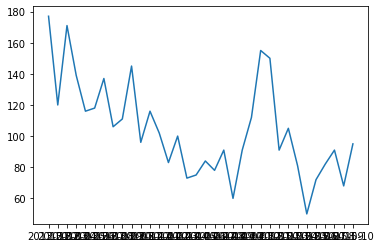

In [19]:
import matplotlib.pyplot as plt
plt.plot(df.yymm,df.item_cnt_day)

In [20]:
yymm = sales.date.str.slice(6,10)+'-'+sales.date.str.slice(3,5)

In [21]:
sales["yymm"] = yymm

In [22]:
sales.drop(["yymm"],axis=1,inplace=True)

In [23]:
df = sales.groupby(["yymm","item_id"]).item_cnt_day.sum().reset_index()

KeyError: 'yymm'

In [24]:
df["ym"] = df.yymm.str.replace('-','').astype("int")

In [25]:
X = df.loc[:,["item_id","ym"]]
y = df.item_cnt_day

KeyError: "['item_id'] not in index"

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from xgboost import XGBRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
xgb = XGBRegressor(verbosity=1,n_estimators=200)

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
y_hat = xgb.predict(X_test)

In [ ]:
X_test["real"] = y_test

In [ ]:
X_test["predict"] = y_hat

In [ ]:
np.sum((X_test.real - X_test.predict)**2)/len(X_test)

In [ ]:
X_train